In [12]:
using DifferentialEquations
using Plots
using Nemo
# using ExactODEReduction
include("../src/ExactODEReduction.jl")

Main.ExactODEReduction

In [13]:
# Load the ODE system from the file
# fname = "/Users/pogudingleb/.julia/dev/ExactODEReduction/examples/BIOMD0000000407.ode"
fname = "/home/sumiya11/exactreduction/finally/Exact-reduction-of-ODE-systems/examples/BIOMD0000000407.ode"
(ode, ics) = ExactODEReduction.load_ODE(fname, true)
@info "Loaded system" ode
@show ics

ics = Dict{Any, Any}("XIAP" => 7.83371, "IKK" => 0.64, "TNF_TNFR_TRADD" => 0.0, "pCasp8" => 3.2, "FLIP_mRNA" => 0.000139056, "TNFR_E" => 0.005, "TNFRC2_pCasp8_pCasp8" => 0.0, "XIAP_mRNA" => 0.000219646, "TNF_E" => 0.2688, "BAR_Casp8" => 0.0, "TNFRC2_FLIP_pCasp8" => 0.0, "TNFR" => 0.00028, "TRAF2" => 0.33056, "TNFRC2" => 0.0, "TNFRC1" => 0.0, "TRADD" => 0.29344, "TNF_TNFR_E" => 0.0, "BAR" => 0.28789, "SINK" => 0.0, "NFkB_N" => 0.000691431, "Casp3" => 0.0, "IkBa_N" => 0.0013839, "IkBa_NFkB_N" => 9.00189e-5, "XIAP_Casp3" => 0.0, "IkBa_mRNA" => 5.31517e-5, "FLIP" => 0.0320472, "PARP" => 1.66667, "TNFRC2_pCasp8" => 0.0, "pCasp3" => 0.8, "RIP" => 0.20256, "TNFRC2_FLIP" => 0.0, "IKKa" => 0.0, "IkBa" => 0.00101518, "TNFRCint2" => 0.0, "A20_mRNA" => 5.56657e-5, "source" => 1.0, "TNFRCint1" => 0.0, "Casp8" => 0.0, "end init" => 0.0, "FADD" => 0.30944, "A20" => 0.104434, "IkBa_NFkB" => 0.0151032, "TNFRC2_FLIP_pCasp8_RIP_TRAF2" => 0.0, "TNFRC2_FLIP_FLIP" => 0.0, "TNFRCint3" => 0.0, "PIkBa" => 0.0,

┌ Info: Loaded system
│   ode =
│    A20'(t) = 30303//2000000*A20_mRNA(t) + 3//312500*I(t)
│    A20_mRNA'(t) = 94697//2500000000*NFkB_N(t)
│    BAR'(t) = 1//1000*BAR_Casp8(t) + 166603//100000000000*I(t)
│    BAR_Casp8'(t) = 520833//1000000*BAR(t)*Casp8(t)
│    Casp3'(t) = 1//64*Casp8(t)*pCasp3(t) + 1//1000*XIAP_Casp3(t)
│    Casp6'(t) = 3//320*Casp3(t)*pCasp6(t)
│    Casp8'(t) = 1//1000*BAR_Casp8(t) + 1//640*Casp6(t)*pCasp8(t) + 3//10*TNFRC2_FLIP_pCasp8(t) + 9//20*TNFRC2_pCasp8_pCasp8(t)
│    FADD'(t) = 967//31250000*I(t)
│    FLIP'(t) = 687273//100000000*FLIP_mRNA(t) + 112451//50000000000*I(t)
│    FLIP_mRNA'(t) = 333333//10000000000*NFkB_N(t)
│    I'(t) = 0
│    IKK'(t) = 1//15625*I(t) + 1//10*IKKa(t)
│    IKKa'(t) = 375//4*IKK(t)*TNFRC1(t) + 1//32*IKK(t)*TNFRC2_FLIP_pCasp8_RIP_TRAF2(t)
│    IkBa'(t) = 32197//12500000*IkBa_N(t) + 606061//10000000*IkBa_mRNA(t)
│    IkBa_N'(t) = 1//200*IkBa(t)
│    IkBa_NFkB'(t) = 5//4*IkBa(t)*NFkB(t) + 30303//2000000*IkBa_NFkB_N(t)
│    IkBa_NFkB_N'(t

Dict{Any, Any} with 52 entries:
  "XIAP"                 => 7.83371
  "IKK"                  => 0.64
  "TNF_TNFR_TRADD"       => 0.0
  "pCasp8"               => 3.2
  "FLIP_mRNA"            => 0.000139056
  "TNFR_E"               => 0.005
  "TNFRC2_pCasp8_pCasp8" => 0.0
  "XIAP_mRNA"            => 0.000219646
  "TNF_E"                => 0.2688
  "BAR_Casp8"            => 0.0
  "TNFRC2_FLIP_pCasp8"   => 0.0
  "TNFR"                 => 0.00028
  "TRAF2"                => 0.33056
  "TNFRC2"               => 0.0
  "TNFRC1"               => 0.0
  "TRADD"                => 0.29344
  "TNF_TNFR_E"           => 0.0
  "BAR"                  => 0.28789
  "SINK"                 => 0.0
  ⋮                      => ⋮

In [15]:
# Call find_reductions providing the loaded system 
# (might take some time)
reductions = ExactODEReduction.find_reductions(ode, loglevel=Logging.Warn)
@info "Found reductions" reductions

# Reduction referred to in the paper
reduction = reductions[8]
@info "New system" reduction[:new_system]
@info "New variables" reduction[:new_vars]
#=
    reduction[:new_vars] = [
    y1=    k6/k1*A20 - k5/k3*FLIP,
    y2=    k6*A20_mRNA - k5*IkBa_mRNA,
    ...
    ]
    
    reduction[:new_system] = [
    y1'=   y2 + k2k6/k1 - k4k5/k3,
    y2'=   0,
    ...
    ]
=#


......................................................

................................................

..........................................

..............................................

......................................

................................................

............

............................................................................

..................................................................

..........

....................................................................

................................................................

..........................

................................

........................................................

................

Now let's solve the original system numerically and then compare the solutions with the solutions of the reduced system.

In [23]:
Float64(x::Nemo.fmpq) = Float64(numerator(x)) / Float64(denominator(x))

function evaluate_float(poly, point)
    result = 0.
    for (c, m) in zip(Nemo.coefficients(poly), Nemo.exponent_vectors(poly))
        result += Float64(c) * sum(point .^ m)    
    end
    return result
end

# # the system to be solved
# function f!(du, u, p, t)
#     for i in eachindex(du)
#         du[i] = evaluate_float(p[i], u)
#     end
#     nothing
# end

evaluate_float (generic function with 1 method)

In [20]:
# species present in the selected reduction
# interesting_species = [
#     ExactODEReduction.A20,
#     ExactODEReduction.A20_mRNA,
#     ExactODEReduction.FLIP,
#     ExactODEReduction.IkBa_mRNA,
#     ExactODEReduction.NFkB,
#     ExactODEReduction.Casp3
# ]

# Solve the original system

xs = ExactODEReduction.vars(ode); n = length(xs)
# @show n
# eqs = [ode.x_equations[xs[i]] for i in 1:n]
# var2idx = Dict((x => i for (i, x) in enumerate(xs)))

problem = ExactODEReduction.ODEtoMTK(ode)

# initial conds.
# I assume initial conditions do not matter much
# for checking the consistency (?)
u0 = [ics["$x"] for x in xs]

start, stop = 0.0, 20.0
tspan = (start, stop)

prob = ODEProblem(problem, u0, tspan, dense=true)
sol = DifferentialEquations.solve(prob)

# sol - solution of the original system,
# For example, the solution for A20
# @show sol[var2idx[ExactODEReduction.A20], :]
@show sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 12-element Vector{Float64}:
  0.0
  0.016589933474970148
  0.18248926822467162
  0.7740161753657451
  1.846878468489367
  3.3913521068506682
  5.400801986725735
  7.959403904293914
 11.085406861069433
 14.822658657341814
 19.210317656291892
 20.0
u: 12-element Vector{Vector{Float64}}:
 [0.104434, 5.56657e-5, 0.28789, 0.0, 0.0, 0.0, 0.0, 0.30944, 0.0320472, 0.000139056  …  0.29344, 0.33056, 7.83371, 0.0, 0.000219646, 0.0, 0.8, 0.064, 3.2, 1.0]
 [0.104434524323653, 5.5975131986389746e-5, 0.2878920972967355, 1.0955610498400384e-6, 4.9227585028804155e-6, 7.939366741389282e-20, 4.3320217642603194e-6, 0.3094398975930216, 0.03204722429614686, 0.00013906972658481675  …  0.29344433202176423, 0.33056035097397823, 7.83371664576397, 1.2649305849300735e-14, 0.00021964601105673167, 2.5519139231337063e-15, 0.8000000000000005, 0.06400032854969692, 3.199984275858521,

In [21]:
# plt = nothing
# for (i, s) in enumerate(interesting_species)
#     if i == 1
#         plt = plot(sol[var2idx[s], :], label=s, xaxis="t", title="From the 50-dim simulation")
#     else
#         plt = plot!(sol[var2idx[s], :], label=s)
#     end
# end
# plt

In [24]:
# xs_r = ExactODEReduction(reduction[:new_system])
# n_r = length(xs_r)

problem_r = ExactODEReduction.ODEtoMTK(reduction[:new_system])

# new initial conditions, inferred as
# u0_r[i] = evaluate new_var[i] at u0
u0_r = [
    evaluate_float(v, u0)
    for v in reduction[:new_vars]
]
# p_r = eqs_r
# @show eqs_r
# @show u0_r

prob_r = ODEProblem(problem_r, u0_r, tspan, dense=true)
sol_r = DifferentialEquations.solve(prob_r)

# y1'(t) = sol_r[1,:]
# y2'(t) = sol_r[2,:]
@show sol_r[1, :]
@show sol_r[2, :]  # this one should be constant


sol_r[1, :] = [-73.73117264455821, -73.73117264455821]
sol_r[2, :] = [-12.25009162409355, -12.25009162409355]


2-element Vector{Float64}:
 -12.25009162409355
 -12.25009162409355

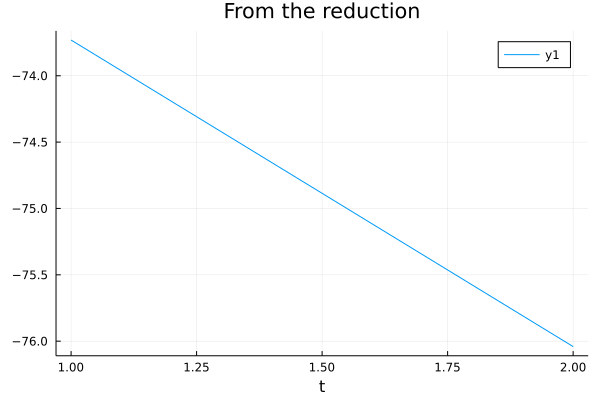

In [27]:
plt_r = plot(sol_r[1, :], label=xs_r[1], xaxis="t", title="From the reduction")
plt_r

In [25]:
### check that the results coincide ?

# sol_c[i] is newvar[i] evaluated at sol

sol_c = []
for i in 1:2
    newvar = reduction[:new_vars][i]
    tseries = []
    for (c, m) in zip(Nemo.coefficients(newvar), Nemo.exponent_vectors(newvar))
        push!(tseries, Float64(c) * sol[findfirst(i -> i == 1, m), :])     
    end
    push!(sol_c, [evaluate_float(newvar, [sol[i, j] for i in 1:n]) for j in 1:length(sol[1, :])])
end

@show sol_c[1]   # inferred y1'
@show sol_c[2];  # inferred y2'

sol_c[1] = [-73.73117264455821, -73.73117218110153, -73.73116754653475, -73.73115102166206, -73.7311210512312, -73.7310779163067, -73.73102184986251, -73.7309506875473, -73.73086451686491, -73.73076384210117, -73.73065225953803, -73.73063337802665]
sol_c[2] = [-12.25009162409355, -12.250091318448298, -12.250054639235273, -12.24942614918848, -12.246300695056782, -12.237286481514971, -12.217441009786178, -12.178126605899685, -12.105530829628414, -11.971807566000905, -11.712763677074065, -11.649087789758923]


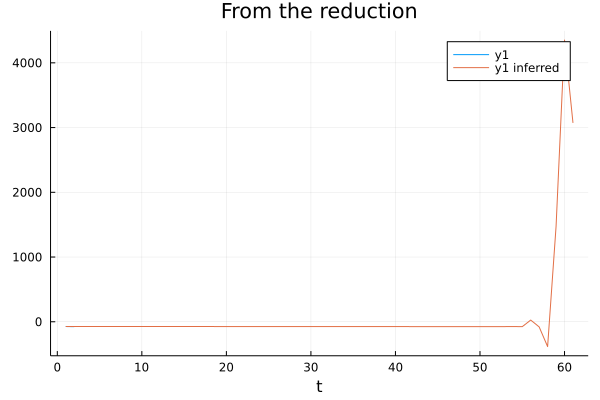

In [29]:
plt_r = plot!(sol_c[1, :], label="$(xs_r[1]) inferred")
plt_r